## **ADVANCED STATISTICS FOR PHYSICS ANALYSIS's FINAL PROJECT**

# **Naive Bayes Classifier for Fake News recognition**

**Elaheh Ahmadieslamloo (2050953)**

# **Introduction**

# **Naive Bayes Classifier for Fake News Recognition**
Fake news are defined by the New York Times as ”a made-up story with an intention to deceive”, with
the intent to confuse or deceive people. They are everywhere in our daily life and they come especially
from social media platforms and applications in the online world. Being able to distinguish fake
contents form real news is today one of the most serious challenges facing the news industry. Naive
Bayes classifiers are powerful algorithms that are used for text data analysis and are connected to
classification tasks of text in multiple classes.
This project implements a Naive Bayes classifier to distinguish between fake and real news using text data. We will use two datasets from Kaggle and perform detailed data preprocessing, model building, and evaluation. The goal is to implement a Multinomial Naive Bayes classifier in R and test its performance.



#**Multinomial Naive Bayes classifier**

The Multinomial Naive Bayes classifier is a variant of the Naive Bayes model specifically designed for classification tasks involving discrete data. It is widely used in text classification and natural language processing (NLP) where the features are typically word frequencies or occurrences.

#**Bayes' Theorem:**

Like all Naive Bayes classifiers, the Multinomial Naive Bayes classifier is based on Bayes' Theorem:

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

Where:

- $P(C|X)$ is the posterior probability of class $C$ given the feature vector (X).
- $P(X|C)$ is the likelihood of feature vector $X$ given class $C$.
- $P(C)$ is the prior probability of class $C$.
- $P(X)$ is the probability of feature vector $X$.


In the context of text classification, the feature vector
$X$ typically represents the frequency of each word (or term) in a document.


# **Data Description**
The datasets used in this project are from Kaggle. The first dataset contains labels ranging from `Barely-True` to `True`

Barely-True - 0

False - 1

Half-True - 2

Mostly-True - 3

Not-Known - 4

True - 5

. The second dataset contains binary labels (`unreliable` and `reliable`).

1: unreliable


0: reliable


- **Dataset 1**: Fake News Content Detection (https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection?select=train.csv)
- **Dataset 2**: Fake News: build a system to identify unreliable news articles (https://www.kaggle.com/competitions/fake-news/data?select=train.csv)


## **Steps of project**

**1. Loading the data**

**2. Preprocessing the texts**

**3. Analyzing the data**

**4. Splitting the data**

**5. Training the model**

**6. Validating the model**

**7. Making predictions on test data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
install.packages("tm")
install.packages("textstem")
install.packages("wordcloud")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘dtt’, ‘ISOcodes’, ‘sylly.en’, ‘sylly’, ‘syuzhet’, ‘fastmatch’, ‘stopwords’, ‘RcppArmadillo’, ‘english’, ‘mgsub’, ‘qdapRegex’, ‘koRpus.lang.en’, ‘hunspell’, ‘koRpus’, ‘lexicon’, ‘quanteda’, ‘SnowballC’, ‘textclean’, ‘textshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(textstem)
library(wordcloud)
library(ggplot2)
library(tm)


Loading required package: koRpus.lang.en

Loading required package: koRpus

Loading required package: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()


Loading required package: RColorBrewer

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate



Attaching package: ‘tm’


The following object is masked from ‘package:koRpus’:

    readTagged




In [ ]:
set.seed(42)

# **Section 1: First Dataset**

## **1.1: Load the data**

In [ ]:
train_csv <- read.csv("/content/drive/MyDrive/data/train.csv", stringsAsFactors = FALSE)
train_csv <- na.omit(train_csv)

## **1.2: Preprocess the texts**


### **Data Cleaning and Transformation Process**

The provided function processes and cleans our text data, preparing it for analysis and feeding to the model. The key steps are:

1. **Text Standardization:** The text data is converted to lowercase, numbers are removed, and punctuation is stripped to ensure consistency.

2. **Noise Reduction:** Common stopwords are removed, and words are stemmed to their root forms, which helps in reducing noise and focusing on the main content.

3. **Whitespace Removal:** Extra whitespace is stripped from the text to avoid unnecessary spacing issues.

After cleaning, the text data is transformed into a Document-Term Matrix (DTM), which is a matrix representation of the text data. Sparse terms, which appear in less than 1% of the documents, are removed to reduce the dimensionality of the matrix. We chose the threshold of 0.99 based on our dataset. This threshold was optimized for our dataset size, ensuring that only terms appearing in at least 1% of the documents were retained. Given the size of our dataset, this threshold provided the best balance between retaining meaningful terms and reducing noise.

In [ ]:
# clean_data takes a dataframe as input and performs several text preprocessing steps
clean_data <- function(data) {
  # Convert the text to character type
  data$Text <- as.character(data$Text)

  # Create a text corpus from the 'Text' column
  data <- VCorpus(VectorSource(data$Text))

  # Convert all text to lowercase
  data <- tm_map(data, content_transformer(tolower))

  # Remove all numbers
  data <- tm_map(data, removeNumbers)

  # Remove common stopwords
  data <- tm_map(data, removeWords, stopwords())

  # Remove all punctuation
  data <- tm_map(data, removePunctuation)

  # Apply stemming to reduce words to their root form
  data <- tm_map(data, stemDocument)

  # Strip whitespace (extra spaces)
  data <- tm_map(data, stripWhitespace)

  # Return the cleaned text corpus
  return(data)
}

In [ ]:
# Apply the clean_data function to the training dataset to preprocess the text
cleaned_texts <- clean_data(train_csv)

# Create a Document-Term Matrix (DTM) from the cleaned text corpus
data_dtm <- DocumentTermMatrix(cleaned_texts)

# Remove sparse terms from the DTM, keeping only terms that appear in at least 1% of the documents
data_dtm <- removeSparseTerms(data_dtm, 0.99)

# Inspect the resulting DTM to see its content
inspect(data_dtm)


<<DocumentTermMatrix (documents: 10240, terms: 185)>>
Non-/sparse entries: 45430/1848970
Sparsity           : 98%
Maximal term length: 10
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   job million obama percent presid say state tax vote year
  1281   0       3     0       2      1   1     5   1    2    3
  1816   2       0     0       0      0   0     0   0    0    1
  2950   0       0     0       1      0   1     2   1    1    0
  3301   0       0     0       0      0   1     0   0    0    1
  4353   0       0     0       1      0   0     0   1    0    1
  6120   0       0     1       0      3   2     0   0    0    0
  708    0       0     0       1      0   0     1   0    0    0
  7551   0       0     0       2      2   3     1   0    2    2
  9032   1       0     0       0      0   0     2   1    0    0
  9963   0       0     0       2      0   0     0   4    1    0


## **1.3: Analysis and visualization of the data**

Visualization of word frequencies from a text corpus using a word cloud and a bar plot. The word cloud shows the top 200 words sized by frequency. The bar plot highlights the top 20 most frequent words , aiding in identifying key themes or topics in the text. Additionally, a histogram is displayed showing the frequency distribution of labels in the dataset.

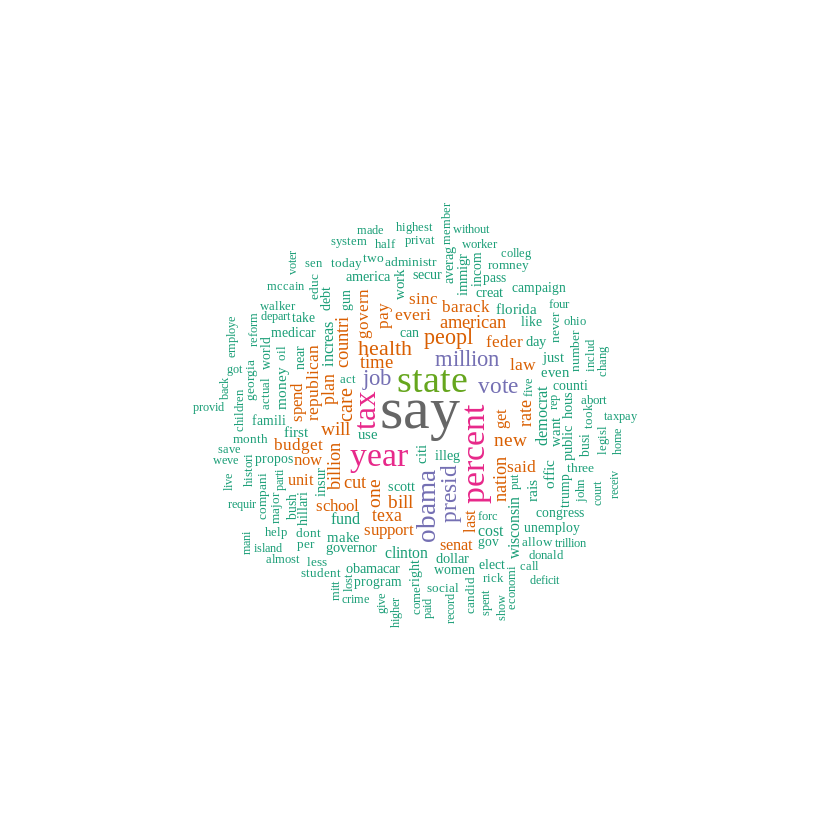

In [ ]:
# Limit the number of words to the top N most frequent
top_n_words <- 200

# Convert DTM to matrix and then to a frequency table
m <- as.matrix(data_dtm)
word_freqs <- sort(colSums(as.matrix(data_dtm)), decreasing = TRUE)
word_freqs_df <- data.frame(word = names(word_freqs), freq = word_freqs)

# Subset to the top N words
word_freqs <- head(word_freqs_df, top_n_words)

# Set color palette
color_palette <- brewer.pal(8, "Dark2")

# Plot the word cloud
wordcloud(words = word_freqs$word,
          freq = word_freqs$freq,
          min.freq = 2,
          max.words = top_n_words,
          random.order = FALSE,
          rot.per = 0.35,
          colors = color_palette,
          scale = c(3, 0.5),
          family = "serif",
          bg = "white")

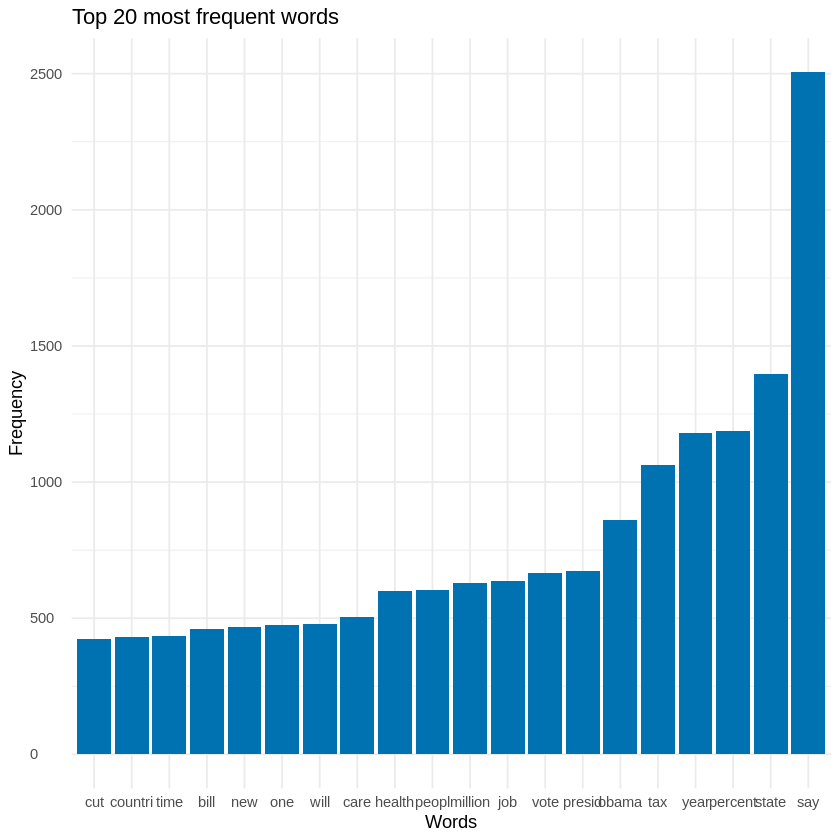

In [ ]:
# Get word frequencies
word_freqs <- sort(colSums(as.matrix(data_dtm)), decreasing = TRUE)
word_freqs_df <- data.frame(word = names(word_freqs), freq = word_freqs)

# Subset the most frequent words
top_words <- head(word_freqs_df, 20)

# Plot
ggplot(top_words, aes(x = freq, y = reorder(word, freq))) +
  geom_bar(stat = "identity", fill = "#0072B2") +
  xlab("Frequency") +
  ylab("Words") +
  ggtitle("Top 20 most frequent words") +
  theme_minimal() +
  theme(axis.text.y = element_text(hjust = 0)) +
  coord_flip()


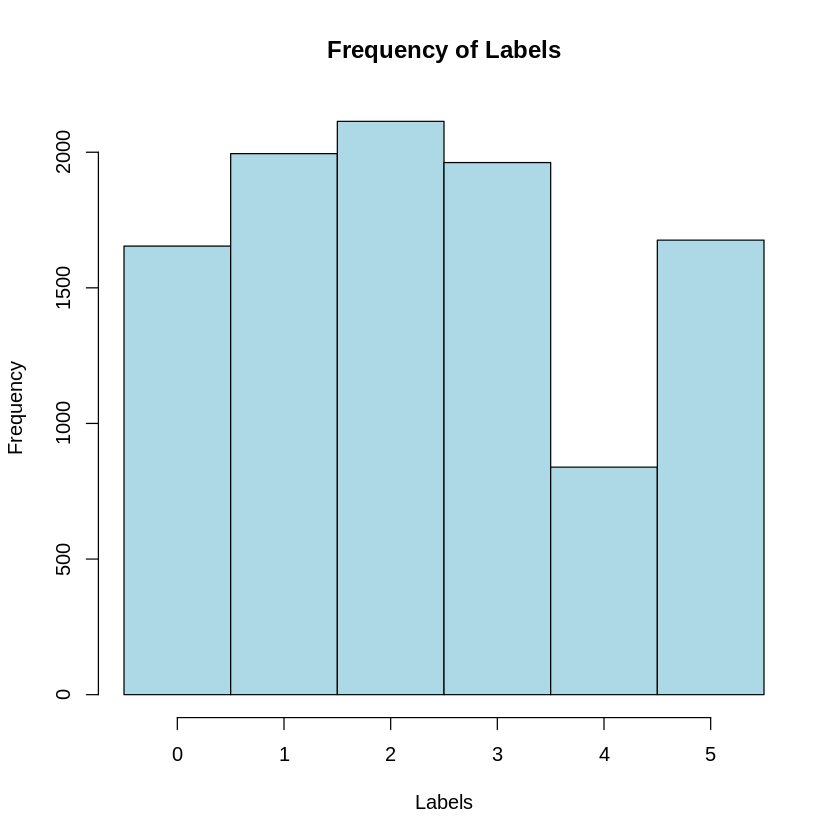

In [ ]:
hist(train_csv$Labels,
     breaks = seq(min(train_csv$Labels) - 0.5, max(train_csv$Labels) + 0.5, 1),
     col = "lightblue",
     main = "Frequency of Labels",
     xlab = "Labels",
     ylab = "Frequency")

## **1.4: Split data into train and validation**

In this step, the data is divided into training and validation sets to prepare for model training. This process involves converting a document-term matrix into a structured data frame, defining labels for supervised learning, and then splitting the dataset into subsets based on a specified training proportion. Random sampling ensures the training set is representative, while the remaining data forms the validation set.

In [ ]:
X   <- data.frame(as.matrix(data_dtm), stringsAsFactors=FALSE)
Y   <- train_csv$Labels


In [ ]:
# Set the proportion for training data
train_proportion <- 0.8

# Calculate the number of samples for training
num_train <- round(nrow(X) * train_proportion)

# Create indices for training and validation sets
train_idx <- sample(nrow(X), num_train, replace = FALSE)

X_train <- X[train_idx, ]
Y_train <- Y[train_idx]

X_val <- X[-train_idx, ]
Y_val <- Y[-train_idx]


## **1.5: Training**

In this step, a function is defined to train a Naive Bayes Classifier (NBC) using the provided training data.

The training function performs several key steps to prepare data for a NBC:

1. **Data Aggregation**: It aggregates the training data by target labels, summing up occurrences of each feature for each label.

2. **Count Adjustment**: To prevent zero counts that could affect probability calculations, all aggregated counts are incremented by one.

3. **Total Calculation**: Computes the total count of occurrences for each label across all features.

4. **Label Density Calculation**: Calculates the density of each label by dividing its count by the total number of data points.

5. **Normalization**: Normalizes the aggregated data by dividing each count by its corresponding total, ensuring proportions instead of absolute counts.

6. **Output Construction**: Organizes the processed data into a structured dataframe format, which serves as the trained NBC model.


In [ ]:
train <- function(X_train, Y_train) {
  # Create a dataframe combining features (X_train) and labels (Y_train)
  df <- data.frame(X_train, Y_train)

  # Aggregate feature occurrences by label (Y_train), summing up counts
  temp_df <- aggregate(. ~ Y_train, df, sum)

  # Add 1 to all columns except the first one to avoid zero counts
  temp_df[, -1] <- temp_df[, -1] + 1

  # Calculate total occurrences for each label (sum across rows)
  temp_df$total <- rowSums(temp_df[, -1])

  # Rename the first column to "Label" for clarity
  colnames(temp_df)[1] <- "Label"

  # Calculate label density: proportion of each label in the dataset
  label_counts <- table(df$Y_train)
  total_rows <- nrow(df)
  label_density <- label_counts / total_rows

  # Add label density as a new column in temp_df
  temp_df$label_density <- label_density

  # Normalize feature occurrences by dividing  total occurrences per label
  columns_to_normalize <- setdiff(names(temp_df), c("Label", "total", "label_density"))
  temp_df[, columns_to_normalize] <- temp_df[, columns_to_normalize] / temp_df$total

  # Assign the processed dataframe to NBC_dataframe
  NBC_dataframe <- temp_df

  # Return the trained Naive Bayes Classifier dataframe
  return(NBC_dataframe)
}


In [ ]:
# Train the Naive Bayes Classifier using the provided training data
NBC_trained <- train(X_train, Y_train)

# Display the first few rows of the trained Naive Bayes Classifier dataframe
head(NBC_trained)


,Label,abort,act,actual,administr,allow,almost,america,american,averag,⋯,will,wisconsin,without,women,work,worker,world,year,total,label_density
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<table[1d]>
1,0,0.003535742,0.003382014,0.003228286,0.003689470,0.002920830,0.002767102,0.003996925,0.006456572,0.003382014,⋯,0.011529593,0.005995388,0.002152191,0.005687932,0.004919293,0.004150653,0.002767102,0.02259800,6505,0.16003418
2,1,0.005020220,0.003207363,0.002789011,0.003207363,0.002789011,0.001673407,0.004880770,0.006554177,0.003346814,⋯,0.012132199,0.008367034,0.002928462,0.003765165,0.006414726,0.002091758,0.003207363,0.02175429,7171,0.19348145
3,2,0.003178207,0.003745743,0.002837684,0.005334847,0.002951192,0.002043133,0.004086266,0.010102157,0.005561862,⋯,0.009080590,0.004199773,0.003064699,0.003291714,0.006242906,0.003405221,0.003972758,0.02485812,8810,0.20812988
4,3,0.001369011,0.003484754,0.004107032,0.003235843,0.003235843,0.003360299,0.004729309,0.010329807,0.006471686,⋯,0.006720597,0.005476042,0.002613566,0.004107032,0.004853765,0.003484754,0.005600498,0.02700685,8035,0.19616699
5,4,0.004468890,0.002062564,0.001718804,0.003781368,0.004812650,0.002062564,0.005156411,0.008250258,0.001031282,⋯,0.016156755,0.007906497,0.001718804,0.003781368,0.005156411,0.001375043,0.005843933,0.01134410,2909,0.08007812
6,5,0.003334921,0.001588058,0.003176116,0.002540892,0.002064475,0.003811339,0.004922979,0.009210735,0.004922979,⋯,0.007940289,0.003811339,0.002858504,0.003493727,0.003493727,0.002858504,0.004446562,0.02652057,6297,0.16210938


## **1.6: Validation**

In this section, a set of functions is defined to facilitate prediction using a trained Naive Bayes Classifier (NBC).
*   The `predict_row` function predicts the label for a given row of data based on non-zero elements and relevant columns in the trained model. It calculates label probabilities and selects the most probable label.
*   The `predict_dataset` function extends this prediction to multiple rows of a dataset, iteratively applying `predict_row` and collecting predicted labels.
*   Finally, `calculate_accuracy` computes the accuracy of the predictions against actual labels, providing a measure of the model's performance.





In [ ]:
predict_row <- function(x, NBC_trained) {

  # Get names of non-zero elements
  non_zero_indices <- which(x != 0)
  non_zero_names <- names(x)[non_zero_indices]

  # Perform an AND operation to get relevant columns
  relevant_columns <- intersect(non_zero_names, colnames(NBC_trained))

  # Get non-zero elements
  non_zero_elements <- c(1, 1, as.integer(x[relevant_columns]))

  relevant_columns <- c("Label", "label_density", relevant_columns)

  # Select columns from NBC_trained
  single_predict <- NBC_trained[, relevant_columns, drop = FALSE]

  # Define power function to apply to each row of single_predict
  power.func <- function(y, non_zero_elements) {
    return(y ** non_zero_elements)
  }

  single_predict <- t(apply(single_predict, 1, power.func, non_zero_elements = non_zero_elements))

  # Calculate label probability
  if (ncol(single_predict) != 2) {
    label_probability <- apply(single_predict[, -1], 1, prod)
  } else {
    label_probability <- single_predict[, 2]
  }

  # Combine label probability with single_predict
  single_predict <- cbind(single_predict, label_probability)

  # Predicted Label
  predicted_label <- single_predict[which.max(single_predict[, ncol(single_predict)]), "Label"]

  # Return the predicted label
  return(predicted_label)
}


# apply this function to the 3rd row of X_val
predicted_label <- predict_row(X_test[3, ], NBC_trained)

predicted_label


Label 
    4

In [ ]:
# Function to predict labels for each row in X_val using a trained NBC model
predict_dataset <- function(X_val, NBC_trained) {
  num_rows <- nrow(X_val)  # Number of rows in the validation dataset X_val
  predicted_labels <- vector("integer", length = num_rows)  # Initialize vector to store predicted labels

  # Iterate over each row in X_val
  for (i in 1:num_rows) {
    predicted_labels[i] <- predict_row(X_val[i,], NBC_trained)  # Predict label for current row using predict_row function
    cat(i, "/", num_rows, "\n")  # Print progress indicator
  }

  return(predicted_labels)  # Return vector of predicted labels
}


In [ ]:
predicted_labels <- predict_dataset(X_val, NBC_trained)  # Call predict_dataset to get predicted labels for X_val

1 / 2048 
2 / 2048 
3 / 2048 
4 / 2048 
5 / 2048 
6 / 2048 
7 / 2048 
8 / 2048 
9 / 2048 
10 / 2048 
11 / 2048 
12 / 2048 
13 / 2048 
14 / 2048 
15 / 2048 
16 / 2048 
17 / 2048 
18 / 2048 
19 / 2048 
20 / 2048 
21 / 2048 
22 / 2048 
23 / 2048 
24 / 2048 
25 / 2048 
26 / 2048 
27 / 2048 
28 / 2048 
29 / 2048 
30 / 2048 
31 / 2048 
32 / 2048 
33 / 2048 
34 / 2048 
35 / 2048 
36 / 2048 
37 / 2048 
38 / 2048 
39 / 2048 
40 / 2048 
41 / 2048 
42 / 2048 
43 / 2048 
44 / 2048 
45 / 2048 
46 / 2048 
47 / 2048 
48 / 2048 
49 / 2048 
50 / 2048 
51 / 2048 
52 / 2048 
53 / 2048 
54 / 2048 
55 / 2048 
56 / 2048 
57 / 2048 
58 / 2048 
59 / 2048 
60 / 2048 
61 / 2048 
62 / 2048 
63 / 2048 
64 / 2048 
65 / 2048 
66 / 2048 
67 / 2048 
68 / 2048 
69 / 2048 
70 / 2048 
71 / 2048 
72 / 2048 
73 / 2048 
74 / 2048 
75 / 2048 
76 / 2048 
77 / 2048 
78 / 2048 
79 / 2048 
80 / 2048 
81 / 2048 
82 / 2048 
83 / 2048 
84 / 2048 
85 / 2048 
86 / 2048 
87 / 2048 
88 / 2048 
89 / 2048 
90 / 2048 
91 / 2048 
92 / 204

In [ ]:
# Function to calculate accuracy
calculate_accuracy <- function(predicted_labels, actual_labels) {
  correct_predictions <- sum(predicted_labels == actual_labels)
  accuracy <- correct_predictions / length(actual_labels)
  return(accuracy)
}

# Assuming Y_val contains the actual labels for X_val
accuracy <- calculate_accuracy(predicted_labels, Y_val)

# Print the accuracy
cat("Accuracy: ", accuracy * 100, "%\n")

Accuracy:  22.31445 %


## **1.7 Test**

In this project, we utilized a dataset from Kaggle to develop and validate a model for classifying fake news. The dataset was divided into three parts: train.csv, test.csv, and submission.csv. The train.csv file contains both the text data and corresponding labels, which were used for training and validating the model. We split the training data into a training set and a validation set to assess the model's performance during development.

The test.csv file, however, does not contain any labels. Its purpose is solely for the model to generate predictions on unseen data. Since the test data lacks labels, we cannot directly measure the test accuracy or compare the predictions against ground truth values. Instead, the focus with the test dataset is to apply the trained model to predict the likelihood of news articles being real or fake.

In [ ]:
test_csv <- read.csv("/content/drive/MyDrive/data/test.csv", stringsAsFactors = FALSE)
test_csv <- na.omit(test_csv)

In [ ]:
# Apply the clean_data function to the test dataset to preprocess the text
cleaned_test <- clean_data(test_csv)

# Create a Document-Term Matrix (DTM) from the cleaned text corpus
test_dtm <- DocumentTermMatrix(cleaned_test)

# Inspect the resulting DTM to see its content
inspect(test_dtm)


<<DocumentTermMatrix (documents: 1267, terms: 3102)>>
Non-/sparse entries: 12794/3917440
Sparsity           : 100%
Maximal term length: 73
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   job million obama percent presid say state tax vote year
  1059   0       0     0       0      0   0     2   2    0    1
  1096   0       1     0       0      0   1     1   2    0    0
  1180   0       0     0       0      0   0     0   0    0    0
  463    0       0     0       0      0   1     0   2    0    2
  688    0       0     0       0      0   2     0   0    0    2
  704    1       1     0       0      1   3     3   0    1    1
  714    0       0     0       0      0   0     0   0    0    0
  751    0       0     0       0      0   2     0   0    0    0
  79     0       0     0       0      0   0     0   1    0    0
  924    0       0     0       4      0   2     2   0    0    1


In [ ]:
X_test   <- data.frame(as.matrix(test_dtm), stringsAsFactors=FALSE)

In [ ]:
test_predicted_labels <- predict_dataset(X_test, NBC_trained)  # Call predict_dataset to get predicted labels for X_test

1 / 1267 
2 / 1267 
3 / 1267 
4 / 1267 
5 / 1267 
6 / 1267 
7 / 1267 
8 / 1267 
9 / 1267 
10 / 1267 
11 / 1267 
12 / 1267 
13 / 1267 
14 / 1267 
15 / 1267 
16 / 1267 
17 / 1267 
18 / 1267 
19 / 1267 
20 / 1267 
21 / 1267 
22 / 1267 
23 / 1267 
24 / 1267 
25 / 1267 
26 / 1267 
27 / 1267 
28 / 1267 
29 / 1267 
30 / 1267 
31 / 1267 
32 / 1267 
33 / 1267 
34 / 1267 
35 / 1267 
36 / 1267 
37 / 1267 
38 / 1267 
39 / 1267 
40 / 1267 
41 / 1267 
42 / 1267 
43 / 1267 
44 / 1267 
45 / 1267 
46 / 1267 
47 / 1267 
48 / 1267 
49 / 1267 
50 / 1267 
51 / 1267 
52 / 1267 
53 / 1267 
54 / 1267 
55 / 1267 
56 / 1267 
57 / 1267 
58 / 1267 
59 / 1267 
60 / 1267 
61 / 1267 
62 / 1267 
63 / 1267 
64 / 1267 
65 / 1267 
66 / 1267 
67 / 1267 
68 / 1267 
69 / 1267 
70 / 1267 
71 / 1267 
72 / 1267 
73 / 1267 
74 / 1267 
75 / 1267 
76 / 1267 
77 / 1267 
78 / 1267 
79 / 1267 
80 / 1267 
81 / 1267 
82 / 1267 
83 / 1267 
84 / 1267 
85 / 1267 
86 / 1267 
87 / 1267 
88 / 1267 
89 / 1267 
90 / 1267 
91 / 1267 
92 / 126

In [ ]:
# Add the predicted_labels column to the data
test_csv$predicted_labels <- test_predicted_labels

# Save the updated data to a new CSV file
write.csv(test_csv, "/content/drive/MyDrive/data/test_predicted.csv", row.names = FALSE)

# **Section 2: Second dataset**

## **2.1: Load the data**

Due to the substantial size of the dataset and the computational resources required for analysis,subset of 5000 randomly sampled was used.

In [ ]:
train_csv <- read.csv("/content/drive/MyDrive/second_data/train.csv", stringsAsFactors = FALSE)
train_csv <- train_csv[,c("label", "text")]
train_csv <- na.omit(train_csv)
train_csv <- train_csv[sample(nrow(train_csv), 5000), ]

In [ ]:
head(train_csv)

label
16527 1    
14687 1    
2303  1    
12876 1    
17274 0    
81    0    
      text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## **2.2: Preprocess the texts**


In [ ]:
# clean_data takes a dataframe as input and performs several text preprocessing steps
clean_data <- function(data) {
  # Convert the text to character type
  data$text <- as.character(data$text)

  # Create a text corpus from the 'text' column
  data <- VCorpus(VectorSource(data$text))

  # Convert all text to lowercase
  data <- tm_map(data, content_transformer(tolower))

  # Remove all numbers
  data <- tm_map(data, removeNumbers)

  # Remove common stopwords
  data <- tm_map(data, removeWords, stopwords())

  # Remove all punctuation
  data <- tm_map(data, removePunctuation)

  # Apply stemming to reduce words to their root form
  data <- tm_map(data, stemDocument)

  # Strip whitespace (extra spaces)
  data <- tm_map(data, stripWhitespace)

  # Return the cleaned text corpus
  return(data)
}

In [ ]:
# Apply the clean_data function to the test dataset to preprocess the text
cleaned_texts <- clean_data(train_csv)

# Create a Document-Term Matrix (DTM) from the cleaned text corpus
data_dtm <- DocumentTermMatrix(cleaned_texts)

# Remove sparse terms from the DTM, keeping only terms that appear in at least 1% of the documents
data_dtm <- removeSparseTerms(data_dtm, 0.99)

# Inspect the resulting DTM to see its content
inspect(data_dtm)


<<DocumentTermMatrix (documents: 5000, terms: 3650)>>
Non-/sparse entries: 986468/17263532
Sparsity           : 95%
Maximal term length: 15
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   like new one peopl said state time trump will year
  1412   57  17  35    63    9    10   32     0   30   24
  3207   13  27  25    21   17    28   17    53   90   22
  3319   51  16  39    80   54    17   36   102   33   26
  3333   34  15  40    60    4    27   30     0   57   35
  366    33  17  83    58   17    24   41    64  157   22
  3768   42   6  41    27    9    14   21    21  103    9
  4505   15  14  21    11   31    18   10   120    3    4
  4612    9   7  23    15    5    69   14     0   17    8
  4853   12   6  15     9    4    20    6     1    7    2
  928    16   7  35    24   13    10   14    68   72    2


## **2.3: Analysis and visualization of the data**

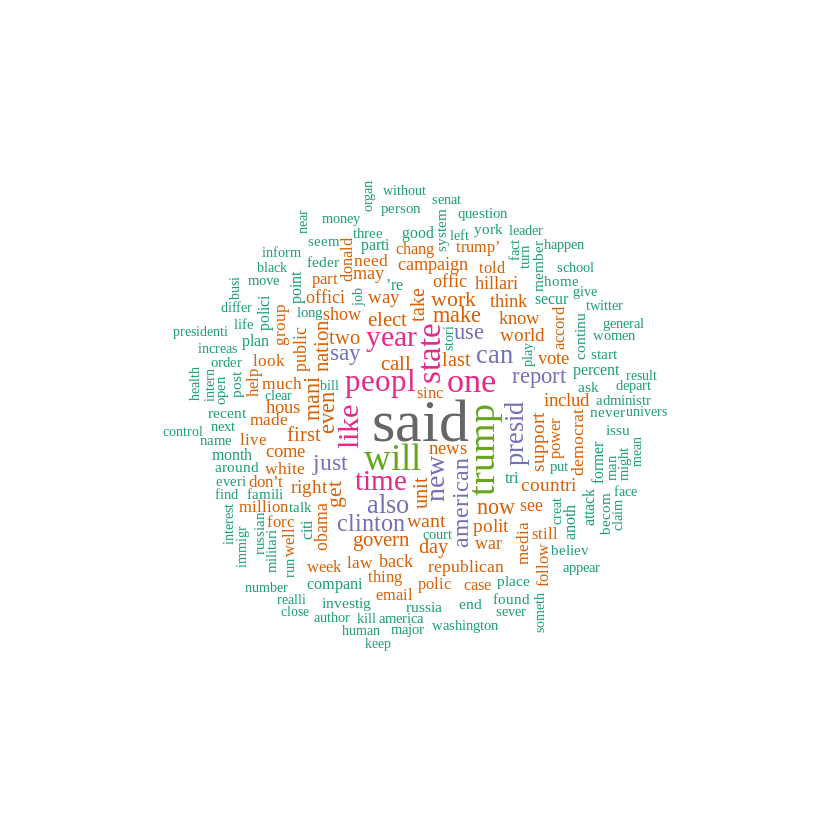

In [ ]:
# Limit the number of words to the top N most frequent
top_n_words <- 200

# Convert DTM to matrix and then to a frequency table
m <- as.matrix(data_dtm)
word_freqs <- sort(colSums(as.matrix(data_dtm)), decreasing = TRUE)
word_freqs_df <- data.frame(word = names(word_freqs), freq = word_freqs)

# Subset to the top N words
word_freqs <- head(word_freqs_df, top_n_words)

# Set color palette
color_palette <- brewer.pal(8, "Dark2")

# Plot the word cloud
wordcloud(words = word_freqs$word,
          freq = word_freqs$freq,
          min.freq = 2,
          max.words = top_n_words,
          random.order = FALSE,
          rot.per = 0.35,
          colors = color_palette,
          scale = c(3, 0.5),
          family = "serif",
          bg = "white")

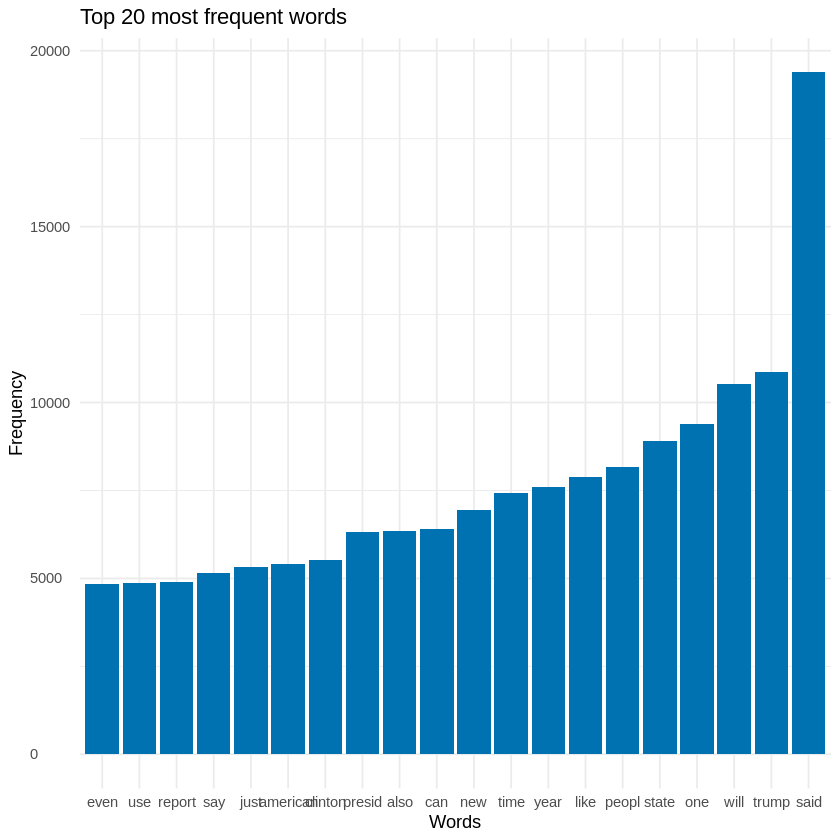

In [ ]:
# Get word frequencies
word_freqs <- sort(colSums(as.matrix(data_dtm)), decreasing = TRUE)
word_freqs_df <- data.frame(word = names(word_freqs), freq = word_freqs)

# Subset the most frequent words
top_words <- head(word_freqs_df, 20)

# Plot
ggplot(top_words, aes(x = freq, y = reorder(word, freq))) +
  geom_bar(stat = "identity", fill = "#0072B2") +  # Default ggplot blue color
  xlab("Frequency") +
  ylab("Words") +
  ggtitle("Top 20 most frequent words") +
  theme_minimal() +
  theme(axis.text.y = element_text(hjust = 0)) +  # Adjust text alignment on y-axis
  coord_flip()


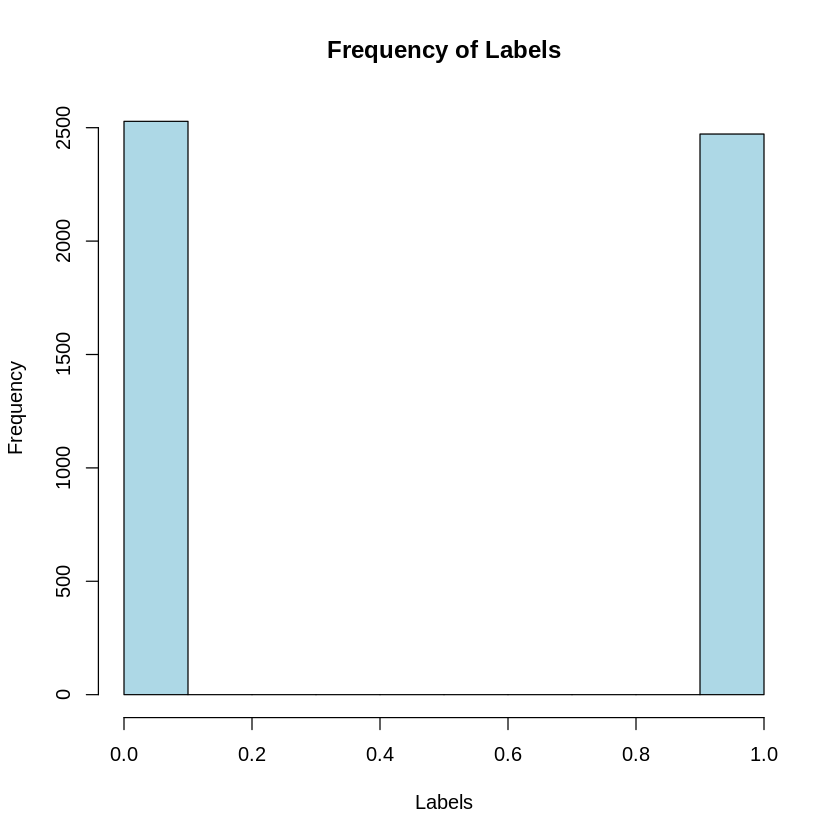

In [ ]:
hist(train_csv$label,
     col = "lightblue",
     main = "Frequency of Labels",
     xlab = "Labels",
     ylab = "Frequency")

## **2.4: Split data into train and validation**

In [ ]:
X   <- data.frame(as.matrix(data_dtm), stringsAsFactors=FALSE)
Y   <- train_csv$label


In [ ]:
# Set the proportion for training data
train_proportion <- 0.8

# Calculate the number of samples for training
num_train <- round(nrow(X) * train_proportion)

# Create indices for training and validation sets
train_idx <- sample(nrow(X), num_train, replace = FALSE)

X_train <- X[train_idx, ]
Y_train <- Y[train_idx]

X_val <- X[-train_idx, ]
Y_val <- Y[-train_idx]

## **2.5: Training**

In [ ]:
train <- function(X_train, Y_train) {
  # Create a dataframe combining features (X_train) and labels (Y_train)
  df <- data.frame(X_train, Y_train)

  # Aggregate feature occurrences by label (Y_train), summing up counts
  temp_df <- aggregate(. ~ Y_train, df, sum)

  # Add 1 to all columns except the first one to avoid zero counts
  temp_df[, -1] <- temp_df[, -1] + 1

  # Calculate total occurrences for each label (sum across rows)
  temp_df$total <- rowSums(temp_df[, -1])

  # Rename the first column to "Label" for clarity
  colnames(temp_df)[1] <- "Label"

  # Calculate label density: proportion of each label in the dataset
  label_counts <- table(df$Y_train)
  total_rows <- nrow(df)
  label_density <- label_counts / total_rows

  # Add label density as a new column in temp_df
  temp_df$label_density <- label_density

  # Normalize feature occurrences by dividing by total occurrences per label
  columns_to_normalize <- setdiff(names(temp_df), c("Label", "total", "label_density"))
  temp_df[, columns_to_normalize] <- temp_df[, columns_to_normalize] / temp_df$total

  # Assign the processed dataframe to NBC_dataframe
  NBC_dataframe <- temp_df

  # Return the trained Naive Bayes Classifier dataframe
  return(NBC_dataframe)
}


In [ ]:
# Train the Naive Bayes Classifier using the provided training data
NBC_trained <- train(X_train, Y_train)

# Display the first few rows of the trained Naive Bayes Classifier dataframe
head(NBC_trained)


,Label,X.ll,X.re,X.ve,X..d,X..ll,X..m,X..re,X..s,X..ve,⋯,yield,york,yorker,young,younger,youth,youtub,zero,zone,label_density
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<table[1d]>
1,0,0.0004571475,0.001558571,0.0007974962,5.651548e-05,5.525958e-05,3.001600e-04,0.0003353252,0.0011931046,2.059675e-04,⋯,5.525958e-05,0.0015962484,7.535398e-05,0.0007535398,1.745700e-04,0.0001230782,7.912167e-05,7.409808e-05,0.0001155428,0.507
2,1,0.0005345748,0.001219331,0.0007294533,2.324238e-05,8.939378e-06,9.475741e-05,0.0001054847,0.0002181208,5.363627e-05,⋯,4.469689e-05,0.0006597261,2.145451e-05,0.0003826054,3.933327e-05,0.0001197877,2.270602e-04,2.002421e-04,0.0002556662,0.493


## **2.6: Validation**

In [ ]:
predict_row <- function(x, NBC_trained) {

  # Get names of non-zero elements
  non_zero_indices <- which(x != 0)
  non_zero_names <- names(x)[non_zero_indices]

  # Perform an AND operation to get relevant columns
  relevant_columns <- intersect(non_zero_names, colnames(NBC_trained))

  # Get non-zero elements
  non_zero_elements <- c(1, 1, as.integer(x[relevant_columns]))

  relevant_columns <- c("Label", "label_density", relevant_columns)

  # Select columns from NBC_trained
  single_predict <- NBC_trained[, relevant_columns, drop = FALSE]

  # Define power function to apply to each row of single_predict
  power.func <- function(y, non_zero_elements) {
    return(y ** non_zero_elements)
  }

  single_predict <- t(apply(single_predict, 1, power.func, non_zero_elements = non_zero_elements))

  # Calculate label probability
  if (ncol(single_predict) != 2) {
    label_probability <- apply(single_predict[, -1], 1, prod)
  } else {
    label_probability <- single_predict[, 2]
  }

  # Combine label probability with single_predict
  single_predict <- cbind(single_predict, label_probability)

  # Predicted Label
  predicted_label <- single_predict[which.max(single_predict[, ncol(single_predict)]), "Label"]

  # Return the predicted label
  return(predicted_label)
}

# Usage example:
# apply this function to the 3rd row of X_val
predicted_label <- predict_row(X_train[3, ], NBC_trained)

predicted_label

Label 
    0

In [ ]:
# Function to predict labels for each row in X_val using a trained NBC model
predict_dataset <- function(X_val, NBC_trained) {
  num_rows <- nrow(X_val)  # Number of rows in the validation dataset X_val
  predicted_labels <- vector("integer", length = num_rows)  # Initialize vector to store predicted labels

  # Iterate over each row in X_val
  for (i in 1:num_rows) {
    predicted_labels[i] <- predict_row(X_val[i,], NBC_trained)  # Predict label for current row using predict_row function
    cat(i, "/", num_rows, "\n")  # Print progress indicator
  }

  return(predicted_labels)  # Return vector of predicted labels
}


In [ ]:
predicted_labels <- predict_dataset(X_val, NBC_trained)  # Call predict_dataset to get predicted labels for X_val

1 / 1000 
2 / 1000 
3 / 1000 
4 / 1000 
5 / 1000 
6 / 1000 
7 / 1000 
8 / 1000 
9 / 1000 
10 / 1000 
11 / 1000 
12 / 1000 
13 / 1000 
14 / 1000 
15 / 1000 
16 / 1000 
17 / 1000 
18 / 1000 
19 / 1000 
20 / 1000 
21 / 1000 
22 / 1000 
23 / 1000 
24 / 1000 
25 / 1000 
26 / 1000 
27 / 1000 
28 / 1000 
29 / 1000 
30 / 1000 
31 / 1000 
32 / 1000 
33 / 1000 
34 / 1000 
35 / 1000 
36 / 1000 
37 / 1000 
38 / 1000 
39 / 1000 
40 / 1000 
41 / 1000 
42 / 1000 
43 / 1000 
44 / 1000 
45 / 1000 
46 / 1000 
47 / 1000 
48 / 1000 
49 / 1000 
50 / 1000 
51 / 1000 
52 / 1000 
53 / 1000 
54 / 1000 
55 / 1000 
56 / 1000 
57 / 1000 
58 / 1000 
59 / 1000 
60 / 1000 
61 / 1000 
62 / 1000 
63 / 1000 
64 / 1000 
65 / 1000 
66 / 1000 
67 / 1000 
68 / 1000 
69 / 1000 
70 / 1000 
71 / 1000 
72 / 1000 
73 / 1000 
74 / 1000 
75 / 1000 
76 / 1000 
77 / 1000 
78 / 1000 
79 / 1000 
80 / 1000 
81 / 1000 
82 / 1000 
83 / 1000 
84 / 1000 
85 / 1000 
86 / 1000 
87 / 1000 
88 / 1000 
89 / 1000 
90 / 1000 
91 / 1000 
92 / 100

In [ ]:
# Function to calculate accuracy
calculate_accuracy <- function(predicted_labels, actual_labels) {
  correct_predictions <- sum(predicted_labels == actual_labels)
  accuracy <- correct_predictions / length(actual_labels)
  return(accuracy)
}

# Assuming Y_val contains the actual labels for X_val
accuracy <- calculate_accuracy(predicted_labels, Y_val)

# Print the accuracy
cat("Accuracy: ", accuracy * 100, "%\n")

Accuracy:  61.1 %


## **2.7 Test**

In [ ]:
test_csv <- read.csv("/content/drive/MyDrive/second_data/test.csv", stringsAsFactors = FALSE)
test_csv <- test_csv[,c("id","text")]
test_csv <- na.omit(test_csv)

test_csv <- test_csv[sample(nrow(test_csv), 5000), ]

In [ ]:
# Apply the clean_data function to the training dataset to preprocess the text
cleaned_test <- clean_data(test_csv)

# Create a Document-Term Matrix (DTM) from the cleaned text corpus
test_dtm <- DocumentTermMatrix(cleaned_test)

# Inspect the resulting DTM to see its content
inspect(test_dtm)


<<DocumentTermMatrix (documents: 5000, terms: 90023)>>
Non-/sparse entries: 1282512/448832488
Sparsity           : 100%
Maximal term length: 412
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   like new one peopl said state time trump will year
  172    43  17  56    78    7    73   32     0  100   40
  1734   17   4  20     9    4     2   26     0    5   23
  23     24  18  39    10   32     5   21     0    4   13
  2426   15   7  31     2   19    20    8     0    1   17
  2626   25  12  44    15  135    13   34     0    8   30
  2661    6   1  27    25    0    15   15     0   22    0
  4470   19  13  38    54   19    42   19    19   30   19
  4928    0   0   0     0    0     0    0     0    0    0
  537    12   9  19     5   18    11   20    21   11   14
  820    33   8  54    58   11    16   25     0   59   20


In [ ]:
X_test   <- data.frame(as.matrix(test_dtm), stringsAsFactors=FALSE)

In [ ]:
test_predicted_labels <- predict_dataset(X_test, NBC_trained)  # Call predict_dataset to get predicted labels for X_test

1 / 5000 
2 / 5000 
3 / 5000 
4 / 5000 
5 / 5000 
6 / 5000 
7 / 5000 
8 / 5000 
9 / 5000 
10 / 5000 
11 / 5000 
12 / 5000 
13 / 5000 
14 / 5000 
15 / 5000 
16 / 5000 
17 / 5000 
18 / 5000 
19 / 5000 
20 / 5000 
21 / 5000 
22 / 5000 
23 / 5000 
24 / 5000 
25 / 5000 
26 / 5000 
27 / 5000 
28 / 5000 
29 / 5000 
30 / 5000 
31 / 5000 
32 / 5000 
33 / 5000 
34 / 5000 
35 / 5000 
36 / 5000 
37 / 5000 
38 / 5000 
39 / 5000 
40 / 5000 
41 / 5000 
42 / 5000 
43 / 5000 
44 / 5000 
45 / 5000 
46 / 5000 
47 / 5000 
48 / 5000 
49 / 5000 
50 / 5000 
51 / 5000 
52 / 5000 
53 / 5000 
54 / 5000 
55 / 5000 
56 / 5000 
57 / 5000 
58 / 5000 
59 / 5000 
60 / 5000 
61 / 5000 
62 / 5000 
63 / 5000 
64 / 5000 
65 / 5000 
66 / 5000 
67 / 5000 
68 / 5000 
69 / 5000 
70 / 5000 
71 / 5000 
72 / 5000 
73 / 5000 
74 / 5000 
75 / 5000 
76 / 5000 
77 / 5000 
78 / 5000 
79 / 5000 
80 / 5000 
81 / 5000 
82 / 5000 
83 / 5000 
84 / 5000 
85 / 5000 
86 / 5000 
87 / 5000 
88 / 5000 
89 / 5000 
90 / 5000 
91 / 5000 
92 / 500

In [ ]:
# Add the predicted_labels column to the data
test_csv$predicted_labels <- test_predicted_labels

# Save the updated data to a new CSV file
write.csv(test_csv, "/content/drive/MyDrive/second_data/test_predicted.csv", row.names = FALSE)

# **Conclusion**


The Naive Bayes classifier was initially tested on a dataset with 6 labels, yielding results with an accuracy of 22.3%. However, when applied to a binary-labeled dataset, its performance improved significantly, achieving an accuracy of 61.1%. This contrast underscores the classifier's varying effectiveness depending on the dataset's complexity and label structure. The difference in performance highlights two key factors. Firstly, the Naive Bayes model's dependency on sufficient data; the initial model underperformed due to inadequate text corpus. Secondly, the advantage of binary over multiclass labeling became apparent; binary targets are inherently clearer and more straightforward for the classifier to distinguish.

# **References**
1. C. D. Manning, Chapter 13, Text Classification and Naive Bayes, in Introduction to Information Retrieval, Cambridge University Press, 2008.
2. Fake News Content Detection, KAGGLE data set: [Kaggle](https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection?select=train.csv)
3. Fake News: build a system to identify unreliable news articles: [Kaggle](https://www.kaggle.com/competitions/fake-news/data?select=train.csv)
